In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read the files
life_df = pd.read_csv('Life Expectancy Data.csv')
diab_df=pd.read_csv('diabetes-prevalence.csv')
covid_df=pd.read_csv('covid-19-vaccine.csv')

In [10]:
# Keep only relevant columns
life = life_df[['Country', 'Status', 'Life expectancy ']]  
life.rename(columns={'Life expectancy ': 'Life_expectancy'}, inplace=True)

diabetes = diab_df[['Entity', 'Diabetes prevalence (% of population ages 20 to 79)']]
diabetes.rename(columns={'Entity': 'Country'}, inplace=True)
diabetes.rename(columns={'Diabetes prevalence (% of population ages 20 to 79)': 'Diabetes_prevalence(%)'}, inplace=True)

covidVac = covid_df[['Entity', 'COVID-19 doses (daily, 7-day average, per million people)']]
covidVac = covidVac.groupby('Entity').max().reset_index()  # Use max vaccination rate
covidVac.rename(columns={'Entity': "Country"}, inplace=True)
covidVac.rename(columns={'COVID-19 doses (daily, 7-day average, per million people)': 'Vaccination_rate(per million people)'}, inplace=True)


/var/folders/h1/lqw4pyzs31s41xd5b0j0d6200000gn/T/ipykernel_10917/2526356609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life.rename(columns={'Life expectancy ': 'Life_expectancy'}, inplace=True)
/var/folders/h1/lqw4pyzs31s41xd5b0j0d6200000gn/T/ipykernel_10917/2526356609.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes.rename(columns={'Entity': 'Country'}, inplace=True)
/var/folders/h1/lqw4pyzs31s41xd5b0j0d6200000gn/T/ipykernel_10917/2526356609.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [11]:
# Merge life + diabetes
df = pd.merge(life, diabetes, on='Country', how='inner')

# Merge with vaccination data
df = pd.merge(df, covidVac, on='Country', how='inner')

# Drop any rows with missing data
df.dropna(inplace=True)

# Preview the merged dataset
print(df.head())

       Country      Status  Life_expectancy  Diabetes_prevalence(%)  \
0  Afghanistan  Developing             65.0                     7.6   
1  Afghanistan  Developing             65.0                    10.9   
2  Afghanistan  Developing             59.9                     7.6   
3  Afghanistan  Developing             59.9                    10.9   
4  Afghanistan  Developing             59.9                     7.6   

   Vaccination_rate(per million people)  
0                             5394.6465  
1                             5394.6465  
2                             5394.6465  
3                             5394.6465  
4                             5394.6465  


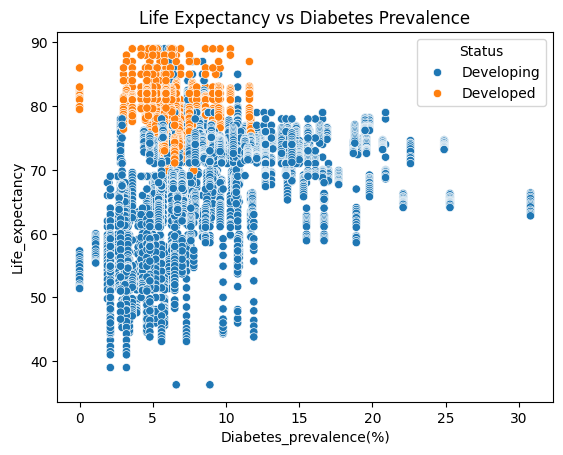

In [12]:
sns.scatterplot(data=df, x='Diabetes_prevalence(%)', y='Life_expectancy', hue='Status')
plt.title('Life Expectancy vs Diabetes Prevalence')
plt.show()


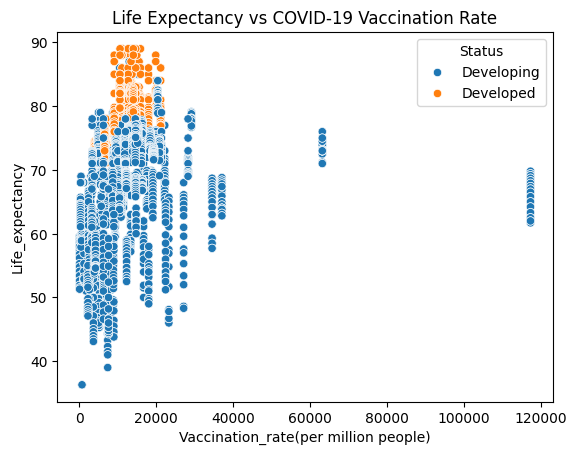

In [14]:
sns.scatterplot(data=df, x='Vaccination_rate(per million people)', y='Life_expectancy', hue='Status')
plt.title('Life Expectancy vs COVID-19 Vaccination Rate')
plt.show()


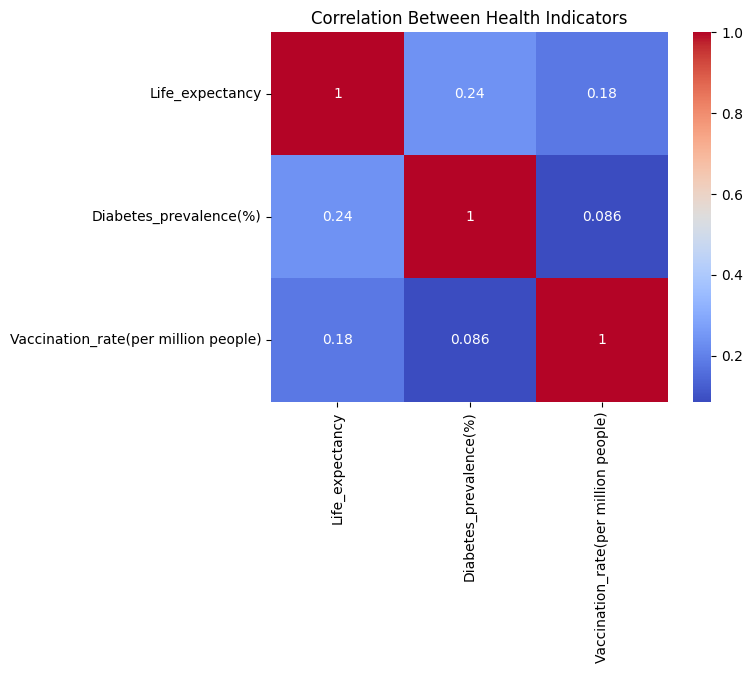

In [15]:
sns.heatmap(df[['Life_expectancy', 'Diabetes_prevalence(%)', 'Vaccination_rate(per million people)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Health Indicators')
plt.show()


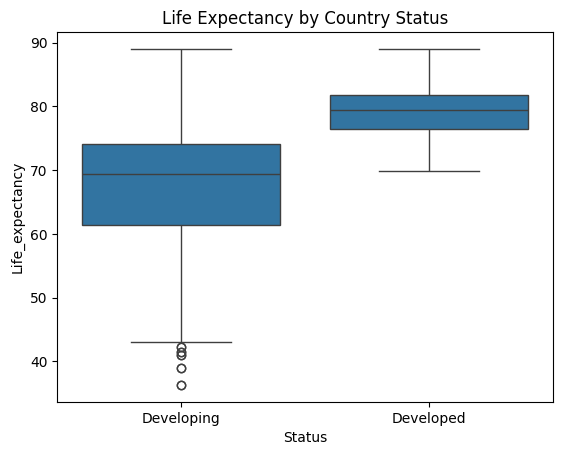

In [16]:
sns.boxplot(x='Status', y='Life_expectancy', data=df)
plt.title('Life Expectancy by Country Status')
plt.show()


In [17]:
df.to_csv("merged_global_health_data.csv", index=False)
